In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('default')

sns.set(style='whitegrid')

In [3]:
df = pd.read_csv('./events.csv', low_memory = False)

In [42]:
df_clean1 = df.drop(['url','staticpage', 'city', 'country', 'operating_system_version', 'screen_resolution','browser_version'], axis = 1)

In [43]:
df_clean1.count()

timestamp           1011288
event               1011288
person              1011288
sku                  563838
model                564284
condition            563836
storage              563836
color                563836
skus                 221699
search_term           48967
campaign_source       82796
search_engine         50957
channel               87378
new_vs_returning      87378
region                87378
device_type           87378
dtype: int64


Regiones con mas eventos
Reviso que regiones son las que mas generan eventos (no filtre por ciudad porque me parecio muy poco representativo) (no filtre por paises porque es basicamente 100% brazil)

Text(0,0.5,'Frecuencia')

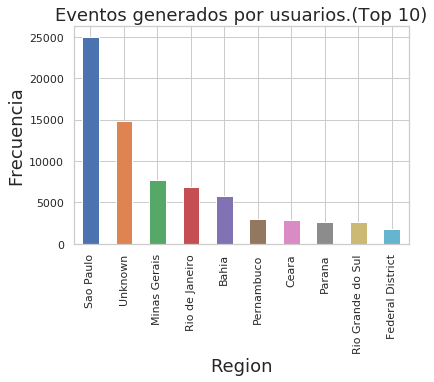

In [44]:
regions_vc = df_clean1['region'].value_counts().iloc[:10]

regions_graf = regions_vc.plot.bar()
regions_graf.set_title("Eventos generados por usuarios.(Top 10)", fontsize=18)
regions_graf.set_xlabel("Region", fontsize=18)
regions_graf.set_ylabel("Frecuencia", fontsize=18)


Eventos que terminaron en ventas¶
Filtre el condicion y la modelo del producto (TOP 5) Me parecio llamativo que productos en muy buen estado como los "Nuevos" y "Excelentes" tengan ventas tanto menores en comparacion con los de estado "Bueno"

In [48]:
ventas_A = df_clean1[(df_clean1.event == 'conversion')]

In [60]:
ventas_A = ventas_A.dropna(axis = 1, how = 'all')
model_vc = ventas_A['model'].value_counts().iloc[:5]
condition_vc = ventas_A['condition'].value_counts()

ventas_A.head()

,timestamp,event,person,sku,model,condition,storage,color
220,2018-03-20 17:46:12,conversion,00204059,3084.0,Motorola Moto X2,Muito Bom,32GB,Couro Vintage
2282,2018-04-26 22:28:53,conversion,00c13dee,6650.0,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco
2547,2018-06-10 14:37:50,conversion,00fdbb4b,3348.0,Samsung Galaxy S6 Flat,Muito Bom,32GB,Branco
4245,2018-03-16 13:50:25,conversion,0146a9df,2694.0,iPhone 5s,Bom,32GB,Cinza espacial
6985,2018-02-09 22:07:07,conversion,01db2fe6,6357.0,Samsung Galaxy J5,Bom,16GB,Preto


Text(0,0.5,'Modelo')

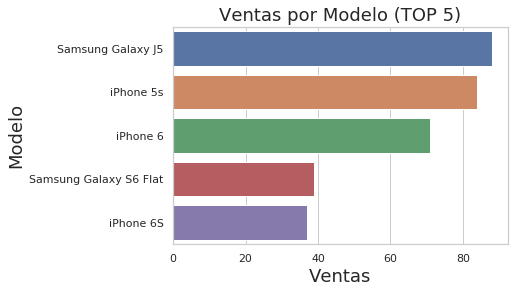

In [61]:
models_graf = sns.barplot(x=model_vc.values, y=model_vc.index)
models_graf.set_title("Ventas por Modelo (TOP 5)", fontsize=18)
models_graf.set_xlabel("Ventas", fontsize=18)
models_graf.set_ylabel("Modelo", fontsize=18)

Text(0,0.5,'Condicion')

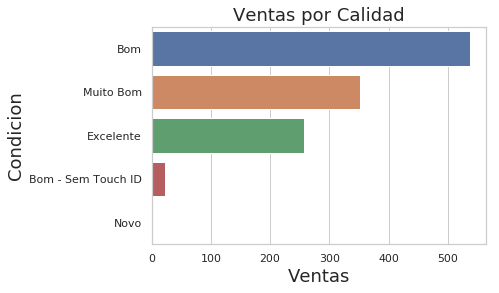

In [62]:
condition_graf = sns.barplot(x=condition_vc.values, y=condition_vc.index)
condition_graf.set_title("Ventas por Calidad", fontsize=18)
condition_graf.set_xlabel("Ventas", fontsize=18)
condition_graf.set_ylabel("Condicion", fontsize=18)

In [11]:
df_clean2 = df[['timestamp','person','event','sku', 'url', 'model', 'condition', 'storage','search_term','campaign_source','channel','new_vs_returning','region','device_type']]


Modelos mas visitados (TOP 10)
Busco cuales son los modelos mas visitados, para ver si hay correlacion con las compras, pedidos (leads), y los productos agregados a carritos/posibles ventas (checkouts)

In [12]:
viewed = df_clean2[(df_clean2.event == 'viewed product')]
viewed = viewed.dropna(axis = 1, how = 'all')
viewed.head()

,timestamp,person,event,sku,model,condition,storage
2,2018-05-31 23:38:09,0004b0a2,viewed product,2694.0,iPhone 5s,Bom,32GB
4,2018-05-29 13:29:25,0006a21a,viewed product,15338.0,Samsung Galaxy S8,Bom,64GB
13,2018-04-09 20:13:14,000a54b2,viewed product,12661.0,Motorola Moto Z Play,Muito Bom,32GB
22,2018-05-24 11:27:47,000a54b2,viewed product,10254.0,iPhone 7 Plus,Excelente,256GB
26,2018-05-24 11:28:59,000a54b2,viewed product,6581.0,iPhone 6S,Bom,16GB


Text(0,0.5,'Modelo')

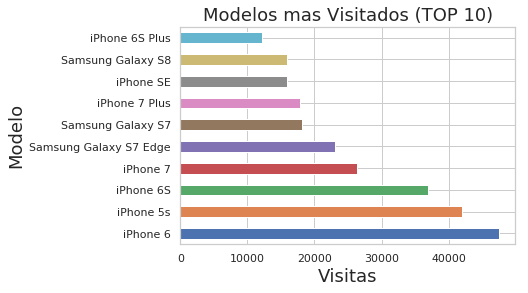

In [13]:
viewed_grouped = viewed.groupby(['model']).count().sort_values(['timestamp'], ascending=False).iloc[:10,:1]
viewed_grouped.columns = ['ammount']
viewed_serie = viewed_grouped.iloc[:,0]

viewed_graf = viewed_serie.plot.barh()
viewed_graf.set_title("Modelos mas Visitados (TOP 10)", fontsize=18)
viewed_graf.set_xlabel("Visitas", fontsize=18)
viewed_graf.set_ylabel("Modelo", fontsize=18)

Modelos mas deseados(leads) (TOP 10)

In [14]:
leads = df_clean2[(df_clean2.event == 'lead')]
leads = leads.dropna(axis = 1, how = 'all')
leads.head()

,timestamp,person,event,model
3248,2018-04-17 22:11:19,01139919,lead,Samsung Galaxy On 7
6636,2018-04-07 11:37:11,01bca043,lead,iPhone 6 Plus
7036,2018-02-12 17:23:30,01db2fe6,lead,Samsung Galaxy J5
13041,2018-03-08 12:39:30,03767f8e,lead,iPhone 6
14203,2018-01-08 14:04:07,03bdcd81,lead,Samsung Galaxy S7 Edge


Text(0,0.5,'Modelo')

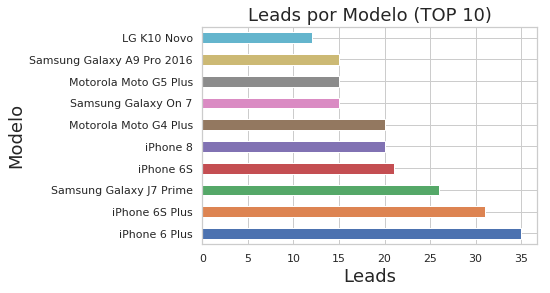

In [15]:
leads_grouped = leads.groupby(['model']).count().sort_values(['timestamp'], ascending=False).iloc[:10,:1]
leads_grouped.columns = ['ammount']
leads_serie = leads_grouped.iloc[:,0]

leads_graf = leads_serie.plot.barh()
leads_graf.set_title("Leads por Modelo (TOP 10)", fontsize=18)
leads_graf.set_xlabel("Leads", fontsize=18)
leads_graf.set_ylabel("Modelo", fontsize=18)

Modelos agregados a checkout (TOP 10)

In [16]:
checkouts = df_clean2[(df_clean2.event == 'checkout')]
checkouts = checkouts.dropna(axis = 1, how = 'all')
checkouts.head()

,timestamp,person,event,sku,model,condition,storage
3,2018-05-31 23:38:40,0004b0a2,checkout,2694.0,iPhone 5s,Bom,32GB
7,2018-05-29 13:29:35,0006a21a,checkout,15338.0,Samsung Galaxy S8,Bom,64GB
44,2018-05-24 11:34:32,000a54b2,checkout,12660.0,Motorola Moto Z Play,Bom,32GB
85,2018-04-06 05:14:58,00184bf9,checkout,6355.0,Samsung Galaxy J5,Excelente,16GB
86,2018-04-06 05:18:15,00184bf9,checkout,6355.0,Samsung Galaxy J5,Excelente,16GB


Text(0,0.5,'Modelo')

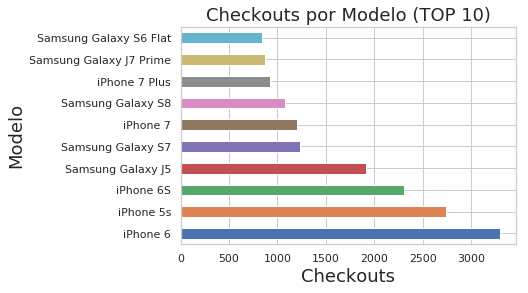

In [17]:
checkouts_grouped = checkouts.groupby(['model']).count().sort_values(['timestamp'], ascending=False).iloc[:10,:1]
checkouts_grouped.columns = ['ammount']

checkouts_serie = checkouts_grouped.iloc[:,0]

checkouts_graf = checkouts_serie.plot.barh()
checkouts_graf.set_title("Checkouts por Modelo (TOP 10)", fontsize=18)
checkouts_graf.set_xlabel("Checkouts", fontsize=18)
checkouts_graf.set_ylabel("Modelo", fontsize=18)

Analisis de las campañas de Marketing

In [18]:
ad_hit = df_clean2[(df_clean2.event == 'ad campaign hit')]
ad_hit = ad_hit.dropna(axis = 1, how = 'all')
ad_hit.head()

,timestamp,person,event,url,campaign_source
0,2018-05-31 23:38:05,0004b0a2,ad campaign hit,/comprar/iphone/iphone-5s,criteo
6,2018-05-29 13:29:27,0006a21a,ad campaign hit,/comprar/samsung/galaxy-s8,criteo
11,2018-04-09 20:12:31,000a54b2,ad campaign hit,/,google
15,2018-05-24 11:21:07,000a54b2,ad campaign hit,/,google
99,2018-05-17 00:08:56,0019c395,ad campaign hit,/comprar/samsung/galaxy-j5,google


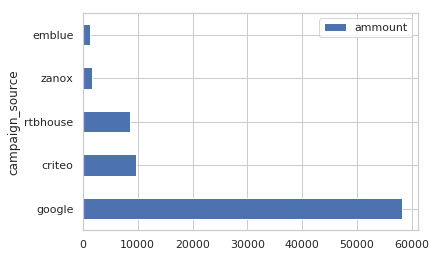

In [19]:
ad_grouped = ad_hit.groupby(['campaign_source']).count().sort_values(['timestamp'] , ascending = False).iloc[:5,:1]
ad_grouped.columns = ['ammount']
ad_grouped.plot.barh()

# Correlacion de entrada por add vs venta de producto

Busco una correlacion entre las entradas de usuarios a travez de adds y la venta del producto por el que entraron. Asi tener una mejor idea de que add devuelve mejor

In [20]:
### Filtro el las columnas del DF para obtener datos relacionados al marketing

marketing = df.iloc[:,:13]
marketing = marketing.drop(['condition','storage','color','search_term','staticpage'],axis = 1)
marketing.head()

,timestamp,event,person,url,sku,model,skus,campaign_source
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,criteo
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,NaN,NaN


In [21]:
### Filtro por publicidades que hayan dirigido al usuario a la compra de algun producto.
### Organizo la informacion en orden que pueda ver por cada usuario, las marcas de 
### celular visitadas y a travez de que fuene de publicidad proviene.

adds_hits = marketing[marketing['campaign_source'].notna()]
adds_hits = adds_hits[(adds_hits['url'] != '/') & (adds_hits['url'] != '/comprar') ]
adds_hits['url'] = adds_hits['url'].str[9:]
adds_hits['url'] = adds_hits['url'].str.partition('/').iloc[:,:1]
adds_hits = adds_hits.dropna(how = 'all', axis = 1).drop(['event'],axis  =1)
adds_hits = adds_hits.rename(index=str, columns={"url": "brand"})
adds_hits = adds_hits.groupby(['person', 'brand','campaign_source']).count().iloc[:,:0]
adds_hits = adds_hits.sort_values(['person'],ascending = False)

adds_hits.head()

Empty DataFrame
Columns: []
Index: [(ffffac8a, samsung, criteo), (fff99b85, iphone, google), (fff60213, samsung, google), (fff568f7, samsung, google), (fff568f7, iphone, criteo)]

In [22]:
### FIltro las ventas por usuario, de manera de poder ver facilmente la cantidad de productos 
### comprados por el mismo, organizados por marca.

ventas = marketing[marketing['event'] == 'conversion']
ventas = ventas.drop(['event','sku','url','skus','campaign_source'], axis = 1)
ventas['brand'] = ventas['model'].str.partition(' ').iloc[:,:1]
ventas = ventas.drop(['model'],axis = 1)
ventas = ventas.groupby(['person','brand']).count()
ventas.columns = ['ammount']
ventas = ventas.sort_values(['ammount'],ascending = False)

ventas.head()

,,ammount
person,brand,
4200bdee,Samsung,12
252adec6,Motorola,12
a0d4baef,Samsung,11
ba325a6b,Samsung,10
a96e304b,iPhone,8


In [23]:
adds = adds_hits.reset_index()
ventas_df = ventas.reset_index()

In [24]:
### Hago un lowercase a la columna de las marcas para poder comparar correctamente contra 
### la tabla de las publicidades

ventas_df['brand'] = ventas_df['brand'].str.lower()

In [25]:
ventas_df.head()

,person,brand,ammount
0,4200bdee,samsung,12
1,252adec6,motorola,12
2,a0d4baef,samsung,11
3,ba325a6b,samsung,10
4,a96e304b,iphone,8


In [26]:
### Hago un merge de las tablas 'ventas_df' y 'adds', para relacionar las compras de cada producto por usuario
### con la entrada del mismo usuario a travez de una publicidad para comprar un producto de la misma marca.
### La idea de este analisis es saber que fuene de publicidad devuelve mejor en cuanto a las ventas.

### AVISO IMPORTANTE
### Hay que tener en cuenta que si por ej 1 usuario compro 1 samsung , pero entro previamente a travez de 
### 1 publicidad de google y criteo , ambas publicidades sobre samsung, la venta se cuenta como que fue gracias
### a ambas publicidades. Por lo tanto si sumamos la cantidad de " ventas totales por fuente de publicidad" 
### (2) va a ser mayor que "las ventas totales " (1). Lo mismo ocurre para el "porcentaje de colavoracion 
### a las ventas"

correlacion_ventas_adds = pd.merge(ventas_df, adds,  how='left', left_on=['person','brand'], right_on = ['person','brand'])

# CHECKING

Tomo como muestra a uno de los clientes y compruebo que los datos de la tabla de correlacion son correctos

### En este caso se puede ver como a pesar de que el usuario compro 12 motorolas, en la tabla de relaciones esa cantidad figura para 3 fuentes de publicidad, dado que el mismo utilizo las 3 para ver el mismo producto.

In [27]:
### correlacion entre las ventas y las fuentes de publicidad

correlacion_ventas_adds[correlacion_ventas_adds['person'] == '252adec6']

,person,brand,ammount,campaign_source
1,252adec6,motorola,12,google
2,252adec6,motorola,12,emblue
3,252adec6,motorola,12,rtbhouse
111,252adec6,samsung,3,criteo


In [28]:
### Entradas del usuario a travez de publicidad

adds[adds['person'] == '252adec6']

,person,brand,campaign_source
19920,252adec6,iphone,criteo
19921,252adec6,motorola,google
19922,252adec6,motorola,emblue
19923,252adec6,motorola,rtbhouse
19924,252adec6,samsung,criteo


In [29]:
### Compras del usuario

ventas_df[ventas_df['person'] == '252adec6']

,person,brand,ammount
1,252adec6,motorola,12
55,252adec6,samsung,3


# Analisis de la correlacion

Organizo por fuentes de publicidad y con la cantidad de publicidades que terminaron que una venta, para ver cual fuente realizo la mejor devolucion.

In [68]:
ventas_totales = ventas_df['ammount'].sum()

cantidadVentasPorFuente = correlacion_ventas_adds[['campaign_source','ammount']]
cantidadVentasPorFuente = cantidadVentasPorFuente.groupby(['campaign_source']).sum().sort_values(['ammount'],ascending = False)
cantidadVentasPorFuente['%_colaboracion_a_las_ventas'] = cantidadVentasPorFuente['ammount']*100/ventas_totales
cantidadVentasPorFuente

,ammount,%_colaboracion_a_las_ventas
campaign_source,,
google,554,47.269625
criteo,399,34.044369
rtbhouse,354,30.204778
emblue,125,10.665529
FacebookAds,34,2.901024
zanox,25,2.133106
datacrush,14,1.194539
buscape,6,0.511945
afilio,3,0.255973


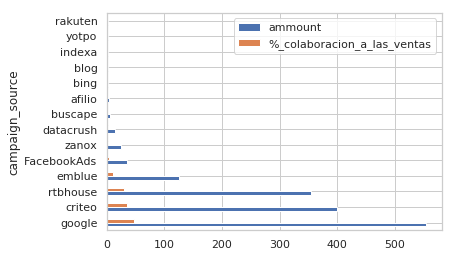

In [84]:
### Falta pulir mucho este plot

cantidadVentasPorFuente.plot.barh()